<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Различными методами и с помощью различных библиотек решить систему нелинейных уравнений, начальное приближение определить графически.

$x_1^2/a^2 + x_2^2/(a/2)^2 - 1 = 0$

$a*x_2 - exp(x_1) - x_1 = 0$

$a = 3$

$eps = 0.0001$


Решение нелинейного уравнения включает в себя поиск значений переменных, удовлетворяющих уравнению. В Python нелинейные уравнения можно решать с помощью библиотек SciPy, NumPy и SymPy.

# Подготовка

In [1]:
import sympy
import numpy as np
sympy.init_printing()
%matplotlib inline

In [3]:
x, y = sympy.symbols('x, y')

In [7]:
equations = [x**2/3**2 + y**2/((3/2)**2) - 1,
             3*y - sympy.exp(x) - x]
unknowns = [x, y]

In [5]:
equations

⎡ 2                                          ⎤
⎢x                       2                  x⎥
⎢── + 0.444444444444444⋅y  - 1, -x + 3⋅y - ℯ ⎥
⎣9                                           ⎦

In [10]:
equations[0]

 2                           
x                       2    
── + 0.444444444444444⋅y  - 1
9                            

In [11]:
equations[1]

            x
-x + 3⋅y - ℯ 

In [6]:
unknowns

[x, y]

# Визуальное решение и определение начального приближения графически

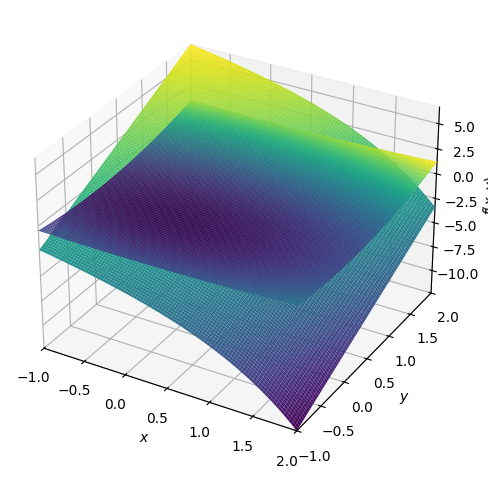

In [9]:
from sympy.plotting import plot3d

plot3d(equations[0], equations[1], (x, -1, 2), (y, -1, 2))

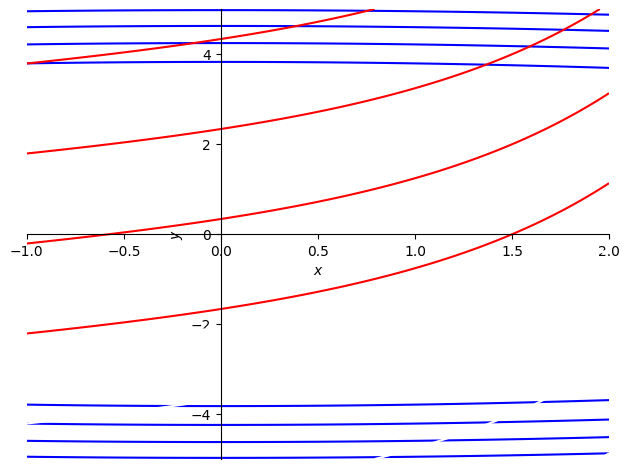

In [8]:
p1 = sympy.plot_implicit(sympy.Eq(equations[0],1),
 (x, -1, 2),adaptive=False,show=False)
p2=sympy.plot_implicit(sympy.Eq(equations[1],0),
(x, -1, 2),adaptive=False,show=False,line_color='red')
p1.append(p2[0]);
p1.show()

# Решение  по алгоритму с использованием numpy по методам Ньютона и простой итерации

In [ ]:


global a
a = 3

def fun_1(x):
    f = x[0] ** 2 / a ** 2 + x[1] ** 2 / (a / 2) ** 2 - 1
    return f

def d_fun_1(x):
    df0 = 2 * x[0] / a ** 2
    df1 = 2 * x[1] / (a / 2) ** 2
    return df0, df1

def fun_2(x):
    f = a * x[1] - np.exp(x[0]) - x[0]
    return f

def d_fun_2(x):
    df0 = - np.exp(x[0]) -1
    df1 = a
    return df0, df1

def Jac(x):
    df1 = d_fun_1(x)
    df2 = d_fun_2(x)
    Jac = np.array([[df1[0], df1[1]], [df2[0], df2[1]]])
    return Jac

def delta(x, f):
    J = Jac(x)
    delta = np.linalg.solve(J, -f)
    return delta

def zero_estimate():
    l = np.array([0.75, 1])
    r = np.array([0.1, 1.63])
    x_0 = (l + r) * 0.5
    return l, r, x_0

def norm(x_cur, x_nex):
    norm = np.sqrt((x_nex[0] - x_cur[0]) ** 2 + (x_nex[1] - x_cur[1]) ** 2)
    return norm

def Newton(eps):
    l, r, x_cur = zero_estimate()
    f = np.array([fun_1(x_cur), fun_2(x_cur)])
    x_nex = x_cur + delta(x_cur, f)
    i = 1
    while norm(x_cur, x_nex) > eps:
        x_cur = x_nex
        f = np.array([fun_1(x_cur), fun_2(x_cur)])
        x_nex = x_cur + delta(x_cur, f)
        i += 1
    return x_nex, i

def fun_1_s(x):
    f = (np.sqrt(abs(- x[1] ** 2 / ((a / 2) ** 2) + 1))) / a
    return f

def fun_2_s(x):
    f = (np.exp(x[0]) + x[0]) / a
    return f

def d_fun_1_s(x):
    df = - 1 / (a ** 4) * np.sqrt(abs(1 - (x[1] / (a / 2)) ** 2))
    return df

def d_fun_2_s(x):
    df = (np.exp(x[0]) + 1) / a
    return df

def df_matrix(x):
    df = [[0, d_fun_1_s(x)], [d_fun_2_s(x), 0]]
    return df

def norm_s(x):
    n = [abs(d_fun_1_s(x)), abs(d_fun_2_s(x))]
    return n

def SimplIt(eps):
    l, r, x_cur = zero_estimate()
    q = max(norm_s(l), norm_s(r))
    x_nex = np.array([fun_1_s(x_cur), fun_2_s(x_cur)])
    i = 1
    check = [q[0] / (1 - q[0]), q[1] / (1 - q[1])] * abs(x_nex - x_cur)
    while (check[0] > eps) and (check[1] > eps):
        x_cur = x_nex
        x_nex = np.array([fun_1_s(x_cur), fun_2_s(x_cur)])
        i += 1
        check = [q[0] / (1 - q[0]), q[1] / (1 - q[1])] * abs(x_nex - x_cur)
    return x_nex, i






def main():
    # x1^2/a^2 + x2^2/(a/2)^2 - 1 = 0
    # a*x2 - exp(x1) -x1 = 0
    # a = 3
    eps = 0.00001
    print('Метод Ньютона: ')
    print('Корни: ', Newton(eps)[0])
    print('Итераций: ', Newton(eps)[1])
    print('Метод Простых Итераций: ')
    print('Корни: ', SimplIt(eps)[0])
    print('Итераций: ', SimplIt(eps)[1])




main()

Метод Ньютона: 
Корни:  [1.11780972 1.39198612]
Итераций:  5
Метод Простых Итераций: 
Корни:  [0.16036609 0.65153014]
Итераций:  1


# Решение с использованием Sympy

Решение нелинейных уравнений, используя метод nonlinsolve из библиотеки Sympy

In [ ]:
solution = sympy.nonlinsolve(equations, unknowns)
solution

⎧                                                                                                  ↪
⎨⎛       __________________________________________________________   ⎞  ⎛      __________________ ↪
⎩⎝-3.0⋅╲╱ -(0.666666666666667⋅y - 1.0)⋅(0.666666666666667⋅y + 1.0) , y⎠, ⎝3.0⋅╲╱ -(0.6666666666666 ↪

↪                                               ⎛        __________________________   ⎞  ⎛       _ ↪
↪ ________________________________________   ⎞  ⎜       ╱                        2    ⎟  ⎜      ╱  ↪
↪ 67⋅y - 1.0)⋅(0.666666666666667⋅y + 1.0) , y⎠, ⎝-3.0⋅╲╱  1 - 0.444444444444444⋅y  , y⎠, ⎝3.0⋅╲╱   ↪

↪ _________________________   ⎞⎫
↪                        2    ⎟⎬
↪ 1 - 0.444444444444444⋅y  , y⎠⎭

Решение нелинейных уравнений, используя метод nsolve из библиотеки Sympy

In [37]:
solution = sympy.nsolve(equations, unknowns, (0,2))
print("Solution:", solution)

Solution: Matrix([[1.11780971539011], [1.39198612063658]])


## Метод Ньютона

In [12]:
from sympy.matrices import Matrix

In [13]:
df1x = sympy.diff(equations[0], x)
df1y = sympy.diff(equations[0], y)
df2x = sympy.diff(equations[1], x)
df2y = sympy.diff(equations[1], y)
df1x, df1y, df2x, df2y

⎛2⋅x                          x       ⎞
⎜───, 0.888888888888889⋅y, - ℯ  - 1, 3⎟
⎝ 9                                   ⎠

In [14]:
I = Matrix([[df1x, df1y],[df2x, df2y]])
I

⎡  2⋅x                        ⎤
⎢  ───     0.888888888888889⋅y⎥
⎢   9                         ⎥
⎢                             ⎥
⎢   x                         ⎥
⎣- ℯ  - 1           3         ⎦

In [15]:
eps = 0.001
x0 = Matrix([0, 0])
x1 = Matrix([2 * eps, 2 * eps])
f = Matrix([equations[0], equations[1]])


In [19]:
while((np.abs(x1[0] - x0[0]) > eps) and np.abs((x1[1] - x0[1])) > eps and x1 > 0):
    x0 = x1
    x1 = x0 - (I.subs({x:x0[0], y:x0[1]}).inv()) * f.subs({x:x0[0], y:x0[1]})
x1

⎡-2.52061677215276 ⎤
⎢                  ⎥
⎣-0.813402273676412⎦

In [ ]:
f.subs({x:x0[0], y:x0[1]})

⎡0.000923140085332452 ⎤
⎢                     ⎥
⎣-0.000198298285432497⎦

## Метод спуска

In [ ]:
phi = equations[0] * equations[0] + equations[1] * equations[1]

In [ ]:
d_phi_x = sympy.diff(phi, x)
d_phi_y = sympy.diff(phi, y)
grad = Matrix([d_phi_x, d_phi_y])

In [ ]:
eps = 0.001
alpha = 0.5
x0 = Matrix([0, 0])
x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})

In [ ]:

while(phi.subs({x:x1[0], y:x1[1]}) > (2 * eps * eps)):
    if phi.subs({x:x1[0], y:x1[1]}) < phi.subs({x:x0[0], y:x0[1]}):
        x0 = x1
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
    else:
        alpha /= 2
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
        print('alpha = ', alpha)
x1

alpha =  0.25
alpha =  0.125
alpha =  0.0625
alpha =  0.03125


⎡1.11706696215726⎤
⎢                ⎥
⎣1.39103252079675⎦

# Решение с помощью **scipy**

In [ ]:
x**2/3**2 + y**2/((3/2)**2) - 1,
3*y - np.exp(x) - x

Решение нелинейных уравнений, используя метод fsolve из библиотеки scipy.optimize для поиска численного решения системы нелинейных уравнений.

In [32]:
from scipy.optimize import fsolve


def equa(vars):
    x, y = vars
    eq1 = x**2/3**2 + y**2/((3/2)**2) - 1
    eq2 = 3*y - np.exp(x) - x
    return [eq1, eq2]

x, y =  fsolve(equa, (0, 2))

print("Решение:", x, y)

Решение: 1.117809715390114 1.3919861206365813



Решение  нелинейных уравнений, используя метод root из библиотеки scipy.optimize

In [31]:
from scipy.optimize import root
solution = root(equa, (0, 2))
print("Решение:", solution.x)

Решение: [1.11780972 1.39198612]


Решение нелинейных уравнений, используя функцию минимизации из библиотеки scipy.optimize для поиска оптимального решения уравнений.

In [34]:
from scipy.optimize import minimize

# Define the equations
def equation1(x, y):
    return x**2/3**2 + y**2/((3/2)**2) - 1

def equation2(x, y):
    return 3*y - np.exp(x) - x

# Define the objective function for optimization
def objective(xy):
    x, y = xy
    return equation1(x, y)**2 + equation2(x, y)**2

# Initial guess
initial_guess = [1, 1]

# Perform optimization
result = minimize(objective, initial_guess)
solution_optimization = result.x

print("Optimization Method Solution:", solution_optimization)

Optimization Method Solution: [1.11780968 1.39198609]
